In [1]:
import numpy as np
import pandas as pd
import results
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D

In [8]:
df = pd.DataFrame(results.results_chiral, columns=results.columns_chiral)
max_val = 1e-6
df["angle"] = 90 - np.rad2deg(np.arccos(np.sqrt(df["power"]/max_val)))

In [4]:
df.head(5)

,length,water,sugar,temp,power,angle
0,0.0,600.0,0.0,23.4,1.370000e-08,2.121202
1,2.9,600.0,0.0,23.3,1.340000e-08,2.097839
2,5.0,600.0,0.0,23.3,1.280000e-08,2.050314
3,8.8,600.0,0.0,23.3,1.250000e-08,2.026134
4,11.8,600.0,0.0,23.3,1.220000e-08,2.001663


In [26]:
def draw_graph_as_function_of_l(amount, return_M=False):
    df1 = df[df["sugar"] == amount]
    x = [i for i in df1["length"]]
    y = [i for i in df1["angle"]]
    x = [[i] for i in x]
    reg = LinearRegression().fit(x, y)
    score = reg.score(x, y)
    rikuz = float(amount)/600
    if rikuz != 0:
        M=reg.coef_[0]/rikuz
    else:
        M="unkonown"
    if return_M:
        return M

    plt.title(f"Current as function of length ,{rikuz:.3f}(gr/ml) sugar\nlinearity score : {score}\ny={reg.coef_[0]}x+{reg.intercept_}\nM={M}")
    plt.plot(x, y, marker="o", label=f"{amount}")
    plt.legend()
    plt.show()

In [27]:
for amount in df["sugar"].unique():
    print(draw_graph_as_function_of_l(amount, return_M=True))

unkonown
0.6281739932635287
9.963857932956868
12.90448224737285
0.0


<IPython.core.display.Javascript object>


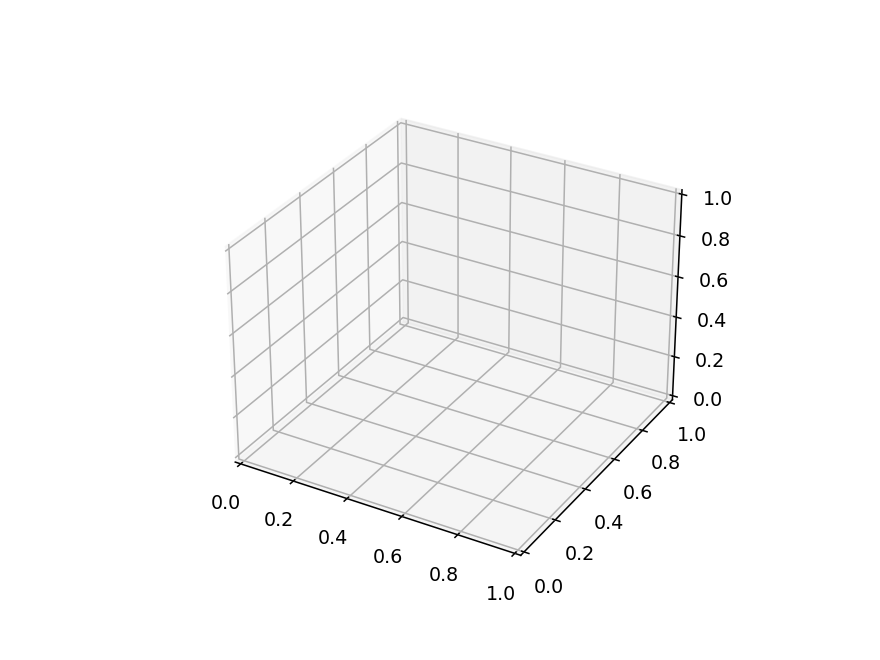

<IPython.core.display.Javascript object>


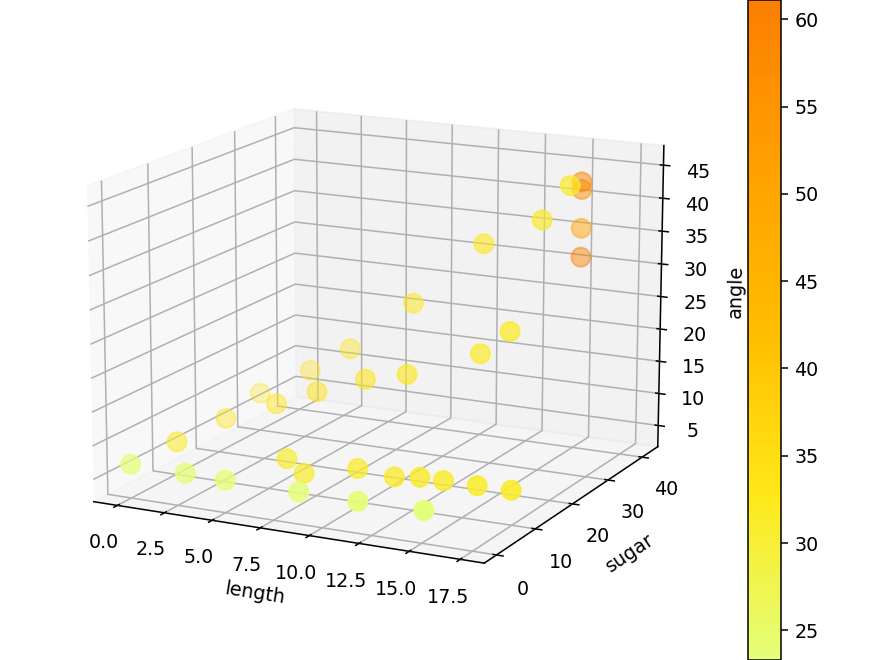

Text(0.5, 0, 'angle')

In [10]:
%matplotlib notebook
import mpld3
mpld3.enable_notebook()

ax = plt.axes(projection='3d')
cm = plt.cm.get_cmap('Wistia')

cs = df["temp"]
cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

fig = plt.figure()
ax = Axes3D(fig)
scalarMap.set_array(cs)
fig.colorbar(scalarMap)
ax.scatter(df["length"], df["sugar"], df["angle"],c=scalarMap.to_rgba(cs), s=100)
ax.set_xlabel("length")
ax.set_ylabel("sugar")
ax.set_zlabel("angle")